# Quantization of Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Quantization Error of a Linear Uniform Quantizer

As illustrated in the [preceding section](linear_uniform_characteristic.ipynb), quantization results in two different types of distortions. Overload distortions are a consequence of exceeding the minimum/maximum amplitude of the quantizer. Granular distortions are a consequence of the quantization process when no clipping occurs. Various measures are used to quantify the distortions of a quantizer. We limit ourselves to the signal-to-noise ratio as commonly used measure.

### Signal-to-Noise Ratio

A quantizer can be evaluated by its [signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) (SNR), which is defined as the power of the continuous amplitude signal $x[k]$ divided by the power of the quantization error $e[k]$. Under the assumption that both signals are drawn from a zero-mean wide-sense stationary (WSS) process, the average SNR is given as

\begin{equation}
SNR = 10 \cdot \log_{10} \left( \frac{\sigma_x^2}{\sigma_e^2} \right) \quad \text{ in dB}
\end{equation}

where $\sigma_x^2$ and $\sigma_e^2$ denote the variances of the signals $x[k]$ and $e[k]$, respectively. The SNR quantifies the average impact of the distortions introduced by quantization. The statistical properties of the signal $x[k]$ and the quantization error $e[k]$ are required in order to evaluate the SNR of a quantizer. First, a statistical model for the quantization error is introduced.

### Model for the Quantization Error

In order to derive the statistical properties of the quantization error, the probability density functions (PDFs) of the quantized signal $x_\text{Q}[k]$ and the error $e[k]$, as well as its bivariate PDFs have to be derived. The underlying calculus is quite tedious due to the nonlinear nature of quantization. Please refer to [[Widrow](../index.ipynb#Literature)] for a detailed treatment. The resulting model is summarized in the following. We focus on the non-clipping case $x_\text{min} \leq x[k] < x_\text{max}$ first, hence on granular distortions. Here the quantization error is in general bounded $|e[k]| < \frac{Q}{2}$.

Under the assumption that the input signal has a wide dynamic range compared to the quantization step size $Q$, the quantization error $e[k]$ can be approximated by the following statistical model

1. The quantization error $e[k]$ is not correlated with the input signal $x[k]$

2. The quantization error is [white](../random_signals/white_noise.ipynb)

    $$ \Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sigma_e^2 $$

3. The probability density function (PDF) of the quantization error is given by the zero-mean [uniform distribution](../random_signals/important_distributions.ipynb#Uniform-Distribution)

    $$ p_e(\theta) = \frac{1}{Q} \cdot \text{rect} \left( \frac{\theta}{Q} \right) $$

The variance of the quantization error is then [derived from its PDF](../random_signals/important_distributions.ipynb#Uniform-Distribution) as

\begin{equation}
\sigma_e^2 = \frac{Q^2}{12}
\end{equation}

Let's assume that the quantization index is represented as binary or [fixed-point number](https://en.wikipedia.org/wiki/Fixed-point_arithmetic) with $w$-bits. The common notation for the mid-tread quantizer is that $x_\text{min}$ can be represented exactly. Half of the $2^w$ quantization indexes is used for the negative signal values, the other half for the positive ones including zero. The quantization step is then given as

\begin{equation}
Q = \frac{ |x_\text{min}|}{2^{w-1}} = \frac{ x_\text{max}}{2^{w-1} - 1}
\end{equation}

where $x_\text{max} = |x_\text{min}| - Q$. Introducing the quantization step, the variance of the quantization error can be expressed by the word length $w$ as

\begin{equation}
\sigma_e^2 = \frac{x^2_\text{max}}{3 \cdot 2^{2w}}
\end{equation}

The average power of the quantization error quarters per additional bit spend. Introducing the variance into the definition of the SNR yields

\begin{equation}
\begin{split}
SNR &= 10 \cdot \log_{10} \left( \frac{3 \sigma_x^2}{x^2_\text{max}}  \right) + 10 \cdot \log_{10} \left( 2^{2w} \right) \\
& \approx 10 \cdot \log_{10} \left( \frac{3 \sigma_x^2}{x^2_\text{max}}  \right) + 6.02 w \quad \text{in dB}
\end{split}
\end{equation}

It now can be concluded that the SNR decays approximately by 6 dB per additional bit spend. This is often referred to as the 6 dB per bit rule of thumb for linear uniform quantization. Note, this holds only under the assumptions stated above.

### Uniformly Distributed Signal

A statistical model for the input signal $x[k]$ is required in order to calculate the average SNR of a linear uniform quantizer. For a signal that conforms to a zero-mean uniform distribution and under the assumption $x_\text{max} \gg Q$ its PDF is given as

\begin{equation}
p_x(\theta) = \frac{1}{2 x_\text{max}} \text{rect}\left( \frac{\theta}{2 x_\text{max}} \right)
\end{equation}

Hence, all amplitudes between $-x_\text{max}$ and $x_\text{max}$ occur with the same probability. The variance of the signal is then calculated to

\begin{equation}
\sigma_x^2 = \frac{4 x_\text{max}^2}{12}
\end{equation}

Introducing $\sigma_x^2$ and $\sigma_e^2$ into the definition of the SNR yields

\begin{equation}
SNR = 10 \cdot \log_{10} \left( 2^{2 w} \right) \approx 6.02 \, w \quad \text{in dB}
\end{equation}

The word length $w$ and resulting SNRs for some typical digital signal representations are

| | $w$ | SNR |
|----|:----:|:----:|
| Compact Disc (CD) | 16 bit | 96 dB |
| Digital Video Disc (DVD) | 24 bit | 144 dB |
| Video Signals | 8 bit | 48 dB |

Note that the SNR values hold only if the continuous amplitude signal conforms reasonably well to a uniform PDF and if it uses the full amplitude range of the quantizer. If the latter is not the case this can be considered by introducing the level $0 < A \leq 1$ into above considerations, such that $x_\text{min} \leq \frac{x[k]}{A} < x_\text{max}$. The resulting variance is given as

\begin{equation}
\sigma_x^2 = \frac{4 x_\text{max}^2 A^2}{12}
\end{equation}

introduced into the definition of the SNR yields

\begin{equation}
SNR = 10 \cdot \log_{10} \left( 2^{2 w} \right) + 20 \cdot \log_{10} ( A ) \approx 6.02 \, w + 20 \cdot \log_{10} ( A ) \quad \text{in dB}
\end{equation}

From this it can be concluded that a level of -6 dB is equivalent to a loss of one bit in terms of SNR of the quantized signal.

#### Example - Quantization of a uniformly distributed signal 

In this example the linear uniform quantization of a random signal drawn from a uniform distribution is evaluated. The amplitude range of the quantizer is $x_\text{min} = -1$ and $x_\text{max} = 1 - Q$.

SNR = 48.090272 in dB


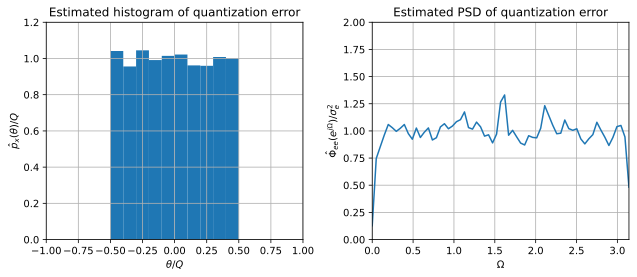

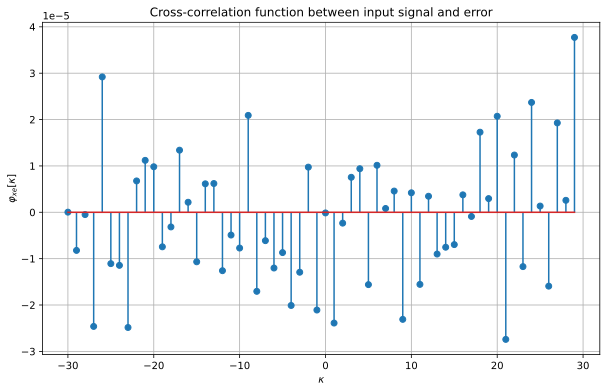

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

w = 8  # wordlength of the quantized signal
xmin = -1  # mimimum amplitude of input signal
N = 8192  # number of samples
K = 30  # maximum lag for cross-correlation


def uniform_midtread_quantizer(x, Q):
    '''Uniform mid-tread quantizer with limiter.'''
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)

    return xQ


def analyze_quantizer(x, e):
    '''Compute and plot PDF, CCF and PSD of quantizer.'''
    # estimated PDF of error signal
    pe, bins = np.histogram(e, bins=20, density=True, range=(-Q, Q))
    # estimate cross-correlation between input and error
    ccf = 1/len(x) * np.correlate(x, e, mode='full')
    # estimate PSD of error signal
    nf, Pee = sig.welch(e, nperseg=128)
    # estimate SNR
    SNR = 10*np.log10((np.var(x)/np.var(e)))
    print('SNR = %f in dB' % SNR)

    # plot statistical properties of error signal
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plt.bar((bins[:-1] + bins[1:])/(2*Q), pe*Q, width=2/len(pe))
    plt.title('Estimated histogram of quantization error')
    plt.xlabel(r'$\theta / Q$')
    plt.ylabel(r'$\hat{p}_x(\theta) / Q$')
    plt.axis([-1, 1, 0, 1.2])
    plt.grid()

    plt.subplot(122)
    plt.plot(nf*2*np.pi, Pee*6/Q**2)
    plt.title('Estimated PSD of quantization error')
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$\hat{\Phi}_{ee}(e^{j \Omega}) / \sigma_e^2$')
    plt.axis([0, np.pi, 0, 2])
    plt.grid()
    plt.tight_layout()

    plt.figure(figsize=(10, 6))
    ccf = ccf[N-K-1:N+K-1]
    kappa = np.arange(-len(ccf)//2, len(ccf)//2)
    plt.stem(kappa, ccf, use_line_collection=True)
    plt.title('Cross-correlation function between input signal and error')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{xe}[\kappa]$')
    plt.grid()


# quantization step
Q = 1/(2**(w-1))
# compute input signal
np.random.seed(1)
x = np.random.uniform(size=N, low=xmin, high=(-xmin-Q))
# quantize signal
xQ = uniform_midtread_quantizer(x, Q)
e = xQ - x
# analyze quantizer
analyze_quantizer(x, e)

**Exercise**

* Change the number of bits `w` and check if the derived SNR holds
* How does the SNR change if you lower the magnitude of the minimum amplitude `xmin` of the input signal?
* What happens if you chose the magnitude of the minimum amplitude `xmin` in the range of the quantization step? Why?

Solution: The numerically computed SNR conforms well to the theoretic result derived above. Lowering the magnitude of the minimum amplitude results in a lower SNR as predicted above. The input signal $x[k]$ is correlated to the quantization error $e[k]$ if the magnitude of the minimum amplitude is lowered such that it is close to the quantization step. Here the assumptions made for the statistical model of the quantization error do not hold.

### Harmonic Signal

For a harmonic input signal $x[k] = x_\text{max} \cdot \cos[\Omega_0 k]$ the variance $\sigma_x^2$ is given by its squared [root mean square](https://en.wikipedia.org/wiki/Root_mean_square) (RMS) value

\begin{equation}
\sigma_x^2 = \frac{x_\text{max}^2}{2}
\end{equation}

Introducing this into the definition of the SNR together with the variance $\sigma_e^2$ of the quantization error yields

\begin{equation}
SNR = 10 \cdot \log_{10} \left(2^{2 w} \cdot \frac{3}{2} \right) \approx 6.02 \, w + 1.76 \quad \text{in dB}
\end{equation}

The gain of 1.76 dB with respect to the case of a uniformly distributed input signal is due to the fact that the amplitude distribution of a harmonic signal is not uniform

\begin{equation}
p_x(\theta) = \frac{1}{\pi \sqrt{1 - (\frac{\theta}{x_\text{max}})^2}}
\end{equation}

for $|\theta| < x_\text{max}$. High amplitudes are more likely to occur. The relative power of the quantization error is lower for higher amplitudes which results in an increase of the average SNR.

### Normally Distributed Signal

So far, we did not consider clipping of the input signal $x[k]$, e.g. by ensuring that its minimum/maximum values do not exceed the limits of the quantizer. However, this cannot always be ensured for practical signals. Moreover, many practical signals cannot be modeled as a uniform distribution. For instance, a [normally distributed](../random_signals/important_distributions.ipynb#Normal-Distribution) random signal exceeds a given maximum value with non-zero probability. Hence, clipping will occur for such an input signal. Clipping results in overload distortions whose amplitude can be much higher that $\frac{Q}{2}$. For the overall average SNR both granular and overload distortions have to be included.

The root mean square (RMS) of the normal distributed input signal is given by its standard deviation $\sigma_x$. The RMS level $A$ of the input signal normalized to the maximum level of the quantizer as

\begin{equation}
A = \frac{\sigma_x}{x_\text{max}}
\end{equation}

The probability that clipping occurs can be derived from the [cumulative distribution function](../random_signals/important_distributions.ipynb#Normal-Distribution) (CDF) of the normal distribution as

\begin{equation}
\Pr \{ |x[k]| > x_\text{max} \} = 1 + \text{erf} \left( \frac{-1}{\sqrt{2} A} \right)
\end{equation}

where $x_\text{max} = - x_\text{min}$ was assumed. For a normally distributed signal with a given probability that clipping occurs $\Pr \{ |x[k]| > x_\text{max} \} = 10^{-5}$ the SNR can be approximately calculated to [[Zölzer](../index.ipynb#Literature)]

\begin{equation}
SNR \approx 6.02 \, w - 8.5 \quad \text{in dB}
\end{equation}

The reduction of the SNR by 8.5 dB results from the fact that small signal values are more likely to occur for a normally distributed signal. The relative quantization error for small signals is higher, which results in a lower average SNR. Overload distortions due to clipping result in a further reduction of the average SNR.

#### Example - Quantization of a normal distributed signal

The following example evaluates the SNR of a linear uniform quantizer with $w=8$ for a normally distributed signal $x[k]$. The SNR is computed and plotted for various RMS levels, the probabilities for clipping are shown additionally.

Maximum SNR = 40.854 dB for A = -11.7 dB with clipping probability 1.2e-04


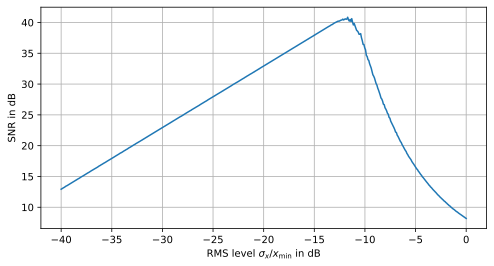

In [2]:
from scipy.special import erf

w = 8  # wordlength of the quantizer
A = np.logspace(-2, 0, num=500)  # RMS levels
N = int(1e6)  # number of samples
np.random.seed(1)


def compute_SNR(a):
    '''Numerically evaluate SNR of a quantized normally distributed signal.'''
    # compute input signal
    x = np.random.normal(size=N, scale=a)
    # quantize signal
    xQ = uniform_midtread_quantizer(x, Q)
    e = xQ - x
    # compute SNR
    SNR = 10*np.log10((np.var(x)/np.var(e)))

    return SNR


def plot_SNR(A, SNR):
    '''Plot SNR.'''
    # plot results
    plt.figure(figsize=(8, 4))
    plt.plot(20*np.log10(A), SNR)
    plt.xlabel(r'RMS level $\sigma_x / x_\mathrm{min}$ in dB')
    plt.ylabel('SNR in dB')
    plt.grid()


# quantization step
Q = 1/(2**(w-1))
# compute SNR for given RMS levels
SNR = [compute_SNR(a) for a in A]
# plot results
plot_SNR(A, SNR)
# find maximum SNR
Amax = A[np.argmax(SNR)]
Pc = 1 + erf(-1/(np.sqrt(2)*Amax))
print(r'Maximum SNR = {0:2.3f} dB for A = {1:2.1f} dB with clipping probability {2:2.1e}'
      .format(np.array(SNR).max(), 20*np.log10(Amax), Pc))

**Exercise**

* Can you explain the overall shape of the SNR?
* For which RMS level and probability of clipping is the SNR optimal?
* Change the wordlength `w` of the quantizer. How does the SNR change?

Solution: The SNR is low for low RMS levels of the input signal since the relative level of the quantization error is high. The SNR increases with increasing level until the clipping errors become dominant which make the SNR decay after its maximum. The SNR is optimal for $A \approx -12$ dB which is equivalent to $\Pr \{ |x[k]| > x_\text{max} \} \approx 10^{-4}$. Increasing the wordlength by one bit increases the SNR approximately by 6 dB.

### Laplace Distributed Signal

The [Laplace distribution](../random_signals/important_distributions.ipynb#Laplace-Distribution) is a commonly applied model for speech and music signals. As for the normal distribution, clipping will occur with a non-zero probability. The probability that clipping occurs can be derived from the [cumulative distribution function](../random_signals/important_distributions.ipynb#Laplace-Distribution) (CDF) of the normal distribution as

\begin{equation}
\Pr \{ |x[k]| > x_\text{max} \} = e^{- \frac{\sqrt{2}}{A}}
\end{equation}

The SNR for a Laplace distributed signal is in general lower compared to a normal distributed signal. The reason for this is, that the Laplace distribution features low signal values with a higher and large values with a lower probability in comparison to the normal distribution. The relative quantization error for small signals is higher, which results in a lower average SNR. The probability of overload distortions is also higher compared to the normal distribution.

#### Example - Quantization of a Laplace distributed signal

The following example evaluates the SNR of a linear uniform quantizer with $w=8$ for a Laplace distributed signal $x[k]$. The SNR is computed and plotted for various RMS levels.

Maximum SNR = 35.581 dB for A = -16.6 dB with clipping probability 7.1e-05


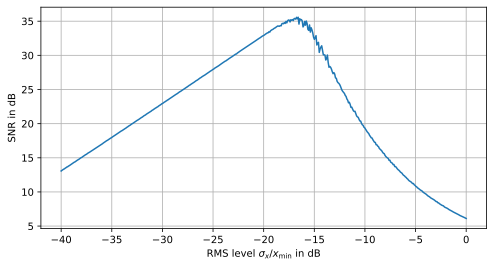

In [3]:
w = 8  # wordlength of the quantizer
A = np.logspace(-2, 0, num=500)  # relative RMS levels
N = int(1e6)  # number of samples
np.random.seed(1)


def compute_SNR(a):
    '''Numerically evaluate SNR of a quantized Laplace distributed signal.'''
    # compute input signal
    x = np.random.laplace(size=N, scale=a/np.sqrt(2))
    # quantize signal
    xQ = uniform_midtread_quantizer(x, Q)
    e = xQ - x
    # compute SNR
    SNR = 10*np.log10((np.var(x)/np.var(e)))

    return SNR


# quantization step
Q = 1/(2**(w-1))
# compute SNR for given RMS levels
SNR = [compute_SNR(a) for a in A]
# plot results
plot_SNR(A, SNR)
# find maximum SNR
Amax = A[np.argmax(SNR)]
Pc = np.exp(-np.sqrt(2)/Amax)
print(r'Maximum SNR = {0:2.3f} dB for A = {1:2.1f} dB with clipping probability {2:2.1e}'
      .format(np.array(SNR).max(), 20*np.log10(Amax), Pc))

**Exercise**

* Compare the SNR for the Laplace distributed signal to the case of a normally distributed signal. What is different?

Solution: The overall SNR is lower compared to the case of a normally distributed signal. Its maximum is also at lower RMS levels. Both can be explained by the properties of the Laplace distribution discussed above.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.